In [1]:
import numpy as np
import pandas as pd
import kaggle.cli
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

from sklearn import preprocessing
from pathlib import Path
from zipfile import ZipFile
from IPython.display import display, HTML

In [2]:
#Source: https://www.kaggle.com/code/hieunt01/used-car-price-predictions-using-linear-regression
class GDLinearRegression:
    def __init__(self, learning_rate=0.1, epsilon=1e-7):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
    
    def set_learning_rate(self, new_learning_rate):
        self.learning_rate = new_learning_rate
    
    def _initialize_params_n_gradients(self, num_params):
        self.theta = np.zeros((num_params,))
        self.gradients = np.zeros((num_params,))
    
    def _get_cost(self):
        y_hat = np.dot(self.X, self.theta)
        cost = 1/2 * np.mean((y_hat-self.y)**2)
        return cost
    
    def _backpropagation(self):
        y_hat = np.dot(self.X, self.theta)
        for i in range(len(self.gradients)):
            self.gradients[i] = np.mean((y_hat - self.y) * self.X[:, i])
    
    def _update_params(self):
        self.theta -= self.learning_rate * self.gradients
    
    def fit(self, X, y):
        # Initialize X, y
        num_data_points = X.shape[0]
        num_features = X.shape[1]
        self.X = np.c_[np.ones((num_data_points, 1)), X]
        self.y = y
        num_params = num_features + 1
        prev_cost = 0
        iteration = 1
        # Initialize parameters theta, and gradients
        self._initialize_params_n_gradients(num_params)
        while True:
            # Compute cost
            cost = self._get_cost()
            # Calculate gradients
            self._backpropagation()
            # Update parameters
            self._update_params()
            # Loop until cost difference below epsilon value
            if np.abs(cost - prev_cost) < self.epsilon:
                break
            prev_cost = cost
            iteration += 1
        # Return the model
        return self
    
    def predict(self, X):
        num_data_points = X.shape[0]
        X_b = np.c_[np.ones((num_data_points, 1)), X]

        return np.dot(X_b, self.theta)

craigslist-carstrucks-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Done


C:\Users\Gabriel\AppData\Local\Temp/ipykernel_66348/3317003985.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  master = master.drop(field,1)


region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders        66629
fuel                16
odometer             0
transmission        31
drive            57382
size            147387
type             29357
paint_color      48397
state                0
lat                931
long               931
dtype: int64
region          237800
price           237800
year            237800
manufacturer    237800
model           237800
condition       237800
cylinders       171171
fuel            237784
odometer        237800
transmission    237769
drive           180418
size             90413
type            208443
paint_color     189403
state           237800
lat             236869
long            236869
dtype: int64


<AxesSubplot:>

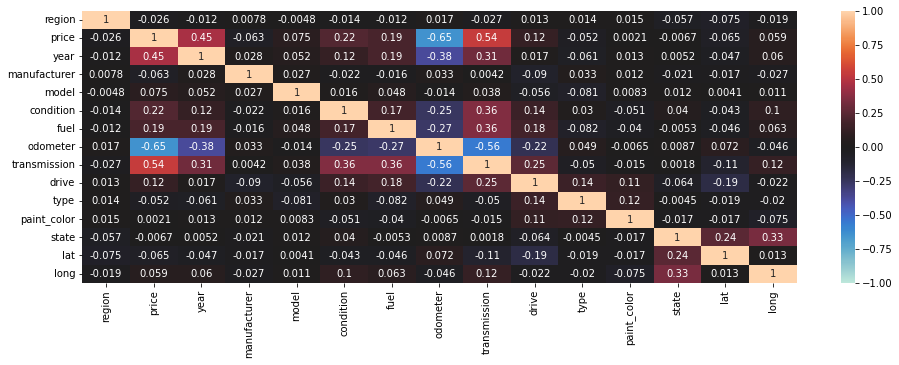

In [24]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

file_name = 'craigslist-carstrucks-data.zip' # dataset name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
    
master = pd.read_csv('vehicles.csv') # file name

drop = {'id', 'url', 'region_url', 'VIN', 'image_url', 'county', 'posting_date', 'description', 'title_status'}

for field in drop:
    if field in master.columns:
        master = master.drop(field,1)

master = master.dropna(subset=['manufacturer', 'model', 'condition', 'odometer'])

print(master.isnull().sum()) # see what is missing from data
print(master.count())

# detect and remove outliers

# remove price outliers
lower_limit_A = np.percentile(master[['price']], 5)
upper_limit_A = np.percentile(master[['price']], 95)

master = master[(master['price'] >= lower_limit_A) & (master['price'] <= upper_limit_A)]  

# remove year outliers
lower_limit_A = np.percentile(master[['year']], .1)

master = master[master['year'] >= lower_limit_A]  


# remove mileage outliers
upper_limit_A = np.percentile(master[['odometer']], 95)

master = master[master['odometer'] <= upper_limit_A]  

catgFeatures = ['region', 'manufacturer', 'model', 'condition', 
                 'fuel', 'odometer', 'transmission', 
                'drive', 'type', 'paint_color', 'state']

#Categorical variable encoding
for feature in catgFeatures:
    featureData = master[feature]
    featuresEncoded = LabelEncoder().fit_transform(featureData)
    master[feature] = featuresEncoded

featureCorrelation = master.corr()
plt.figure(figsize=(16,5))
sns.heatmap(featureCorrelation, annot=True, vmin=-1, vmax=1, center=0)

In [4]:
X = master[['year','model','condition','fuel','transmission','drive','odometer']].values
y = master['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.2, random_state=25)

RMSE for testing set: : 7626.995
R^2 score for testing set:  0.5112798824915863
Bias: 17142.153600098
[[87.65424365 86.80621811 87.35684394 87.33743391 86.64333479]
 [87.28796384 87.48251149 87.13221803 87.60974576 86.98536691]
 [87.23353113 87.41103756 87.0703881  87.59515342 87.09247698]
 [87.2569645  87.41704314 87.16026811 87.67345092 87.03528504]
 [87.22752992 87.45368539 87.14684017 87.699497   86.99714397]]


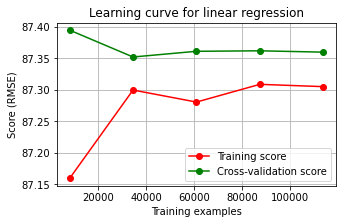

In [16]:
#linear regression (gradient descent)
normalizer = StandardScaler().fit(X_train)

gd_lr = Pipeline([('scaler', normalizer),
                  ('GDLR', GDLinearRegression())])
gd_lr.fit(X_train, y_train)

y_pred_gd = gd_lr.predict(X_test)
r2 = r2_score(y_test,y_pred_gd)
print("RMSE for testing set: : %.3f" % mean_squared_error(y_test, y_pred_gd, squared=False))
print('R^2 score for testing set: ', r2)
print('Bias:', gd_lr['GDLR'].theta[0])

train_sizes = np.linspace(0.05, 0.7, 5)


train_sizes, train_mse, test_mse = learning_curve(gd_lr, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=5, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('Learning curve for linear regression (gradient descent)')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()



In [19]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

y_pred_poly = linear_model.LinearRegression()
y_pred_poly.fit(X_test_scaled,y_test)

y_pred_poly = y_pred_poly.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_poly))
r2 = r2_score(y_test,y_pred_poly)
print('RMSE for testing set: ', rmse)
print('R^2 score for testing set: ', r2)

RMSE for testing set:  7625.107284685967
R^2 score for testing set:  0.5115217168461956


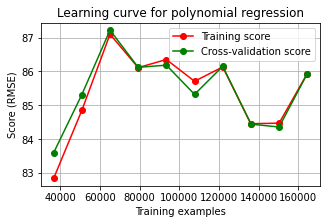

In [20]:
#Learning curve for polynomial regression
train_sizes = np.linspace(0.2, 0.9, 10)

train_sizes, train_mse, test_mse = learning_curve(pol_reg, X_poly, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('Learning curve for polynomial regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [21]:
# Random Forest regression
rfr = Pipeline([('scaler', normalizer),
                ('Random Forest', RandomForestRegressor(random_state=20))])
rfr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Random Forest', RandomForestRegressor(random_state=20))])

# Random Forest
y_pred_rf = rfr.predict(X_test)
r2 = r2_score(y_test,y_pred_rf)
print('RMSE for testing set: ', mean_squared_error(y_test, y_pred_rf, squared=False))
print('R^2 score for testing set: ', r2)

RMSE for testing set:  3239.3090745278614
R^2 score for testing set:  0.9118427328477374


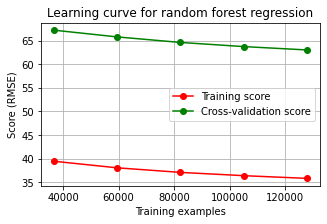

In [23]:
#Learning curve for Random Forest regression

train_sizes = np.linspace(0.2, 0.7, 5)

train_sizes, train_mse, test_mse = learning_curve(rfr, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('Learning curve for random forest regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()